In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def numerizeClass(column):
    unq = df[column].dropna().unique()
    cnt = 0
    for u in unq:
        # idx = df[df[column] == u].index.tolist()
        df[column].replace(u,cnt, inplace = True)
        # print(df[column])
        cnt +=1
    

# Data introduction

In [78]:
import pandas as pd
import re
import numpy as np
df = pd.read_csv('autos.csv',header=0,encoding='iso8859_2')

df['seller'].value_counts()
# mazu nepotrebne sloupce - nazev inzeratu, datum stazeni, pocet fotek = vzdy 0
# druheho typu je tak malo ze to nema smysl resit
df = df.drop(['name','dateCrawled','nrOfPictures','seller'],axis=1)
df.head()


,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


## Categorical data handeling

In [80]:
nonnumericColumns = list(df.select_dtypes(include=['object']).columns)
dateColumns = [c for c in nonnumericColumns if re.match('date|month|lastSeen',c)]
groups = set(nonnumericColumns) -  set(dateColumns)
# print(groups)
# integer encoding
for g in list(groups):
    numerizeClass(g)

# 2016-03-24 11:52:17
for c in dateColumns:
    # df[c].str.replace("-","").astype(int)
    # df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")
    df[c] = pd.to_datetime(df[c])
df.head()


,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,0,480,0,NaN,1993,0.0,0,0.0,150000,0,0.0,0,NaN,2016-03-24,70435,2016-04-07 03:16:57
1,0,18300,0,0.0,2011,0.0,190,NaN,125000,5,1.0,1,0.0,2016-03-24,66954,2016-04-07 01:46:50
2,0,9800,0,1.0,2004,1.0,163,1.0,125000,8,1.0,2,NaN,2016-03-14,90480,2016-04-05 12:47:46
3,0,1500,0,2.0,2001,0.0,75,0.0,150000,6,0.0,0,1.0,2016-03-17,91074,2016-03-17 17:40:17
4,0,3600,0,2.0,2008,0.0,69,2.0,90000,7,1.0,3,1.0,2016-03-31,60437,2016-04-06 10:17:21


## Nan data removal

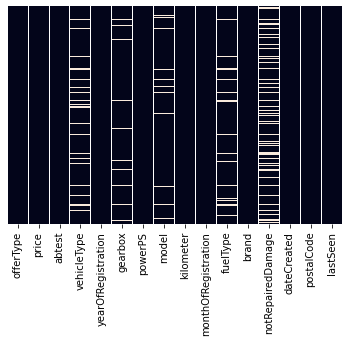

In [66]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

(260956, 16)


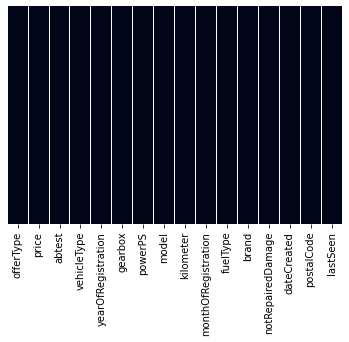

In [67]:
#mazu radky obsahujici nan
df.isnull().sum()
df.dropna(inplace=True)
# print(df.shape)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

## Counts of differente columns

In [13]:
df.columns

Index(['offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'postalCode',
       'lastSeen'],
      dtype='object')

/home/peter/projects/NSA/semestralka/.venv/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


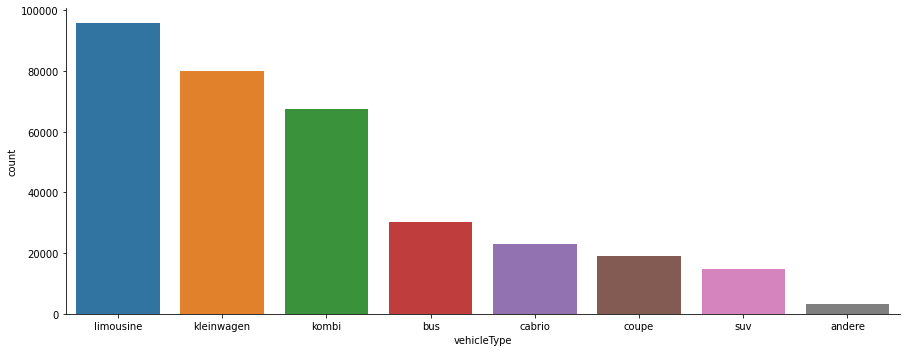

In [79]:
vegicleType = sns.factorplot(x='vehicleType', data=df , kind='count',aspect=2.5, order=pd.value_counts(df['vehicleType']).iloc[:40].index)
vegicleType.savefig('countVehiclesByCategory.png')

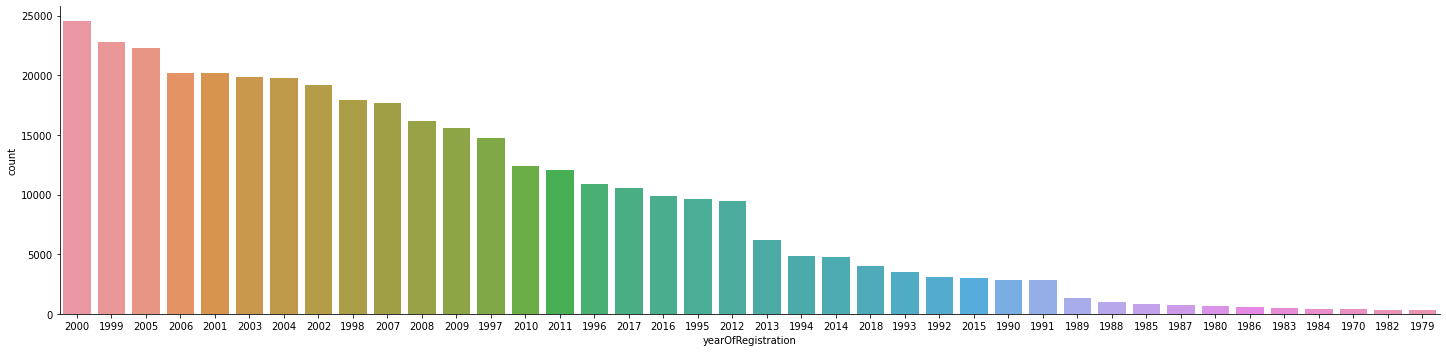

In [48]:
yearOfRegistration = sns.factorplot(x='yearOfRegistration', data=df , kind='count',aspect=4 ,order=pd.value_counts(df['yearOfRegistration']).iloc[:40].index)
yearOfRegistration.savefig('countYearOfRegistrationByYear.png')

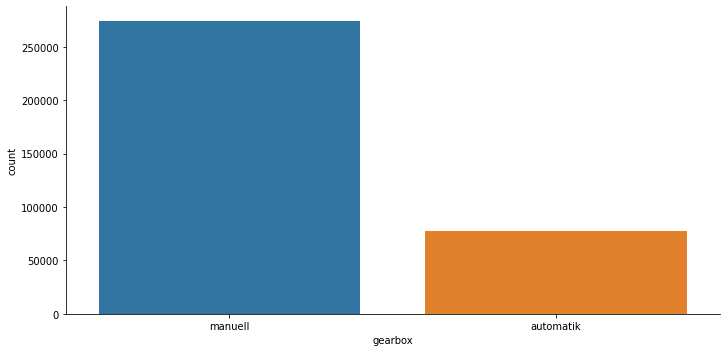

In [50]:
gearbox = sns.factorplot(x='gearbox', data=df , kind='count',aspect=2 ,order=pd.value_counts(df['gearbox']).iloc[:40].index)
gearbox.savefig('countGearbox.png')

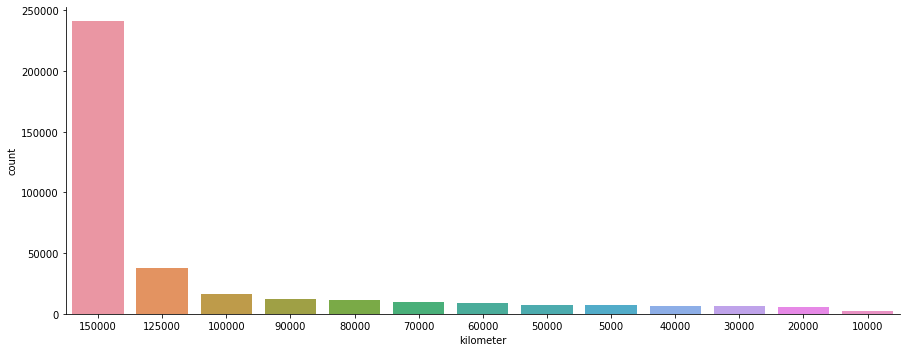

In [53]:
kilometer = sns.factorplot(x='kilometer', data=df , kind='count',aspect=2.5 ,order=pd.value_counts(df['kilometer']).iloc[:20].index)
kilometer.savefig('countKilometer.png')

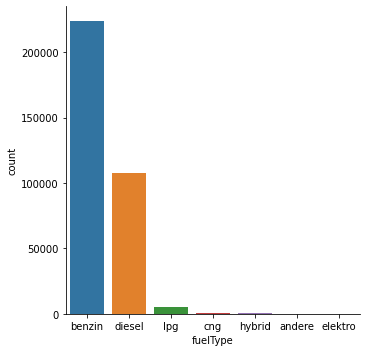

In [55]:
fuelType = sns.factorplot(x='fuelType', data=df , kind='count',aspect=1 ,order=pd.value_counts(df['fuelType']).iloc[:10].index)
fuelType.savefig('countFuelType.png')

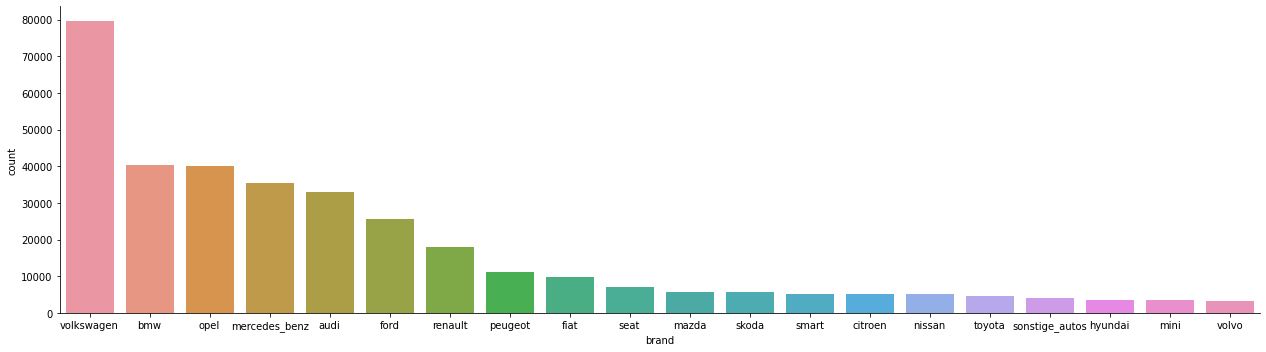

In [58]:
brand = sns.factorplot(x='brand', data=df , kind='count',aspect=3.5 ,order=pd.value_counts(df['brand']).iloc[:20].index)
brand.savefig('countBrand.png')

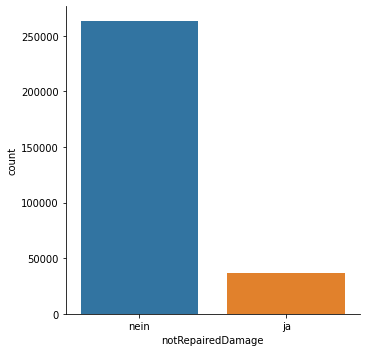

In [59]:
notRepairedDamage = sns.factorplot(x='notRepairedDamage', data=df , kind='count',aspect=1 ,order=pd.value_counts(df['notRepairedDamage']).iloc[:10].index)
notRepairedDamage.savefig('countNotRepairedDamage.png')

## Correlation heatmap, Pairplot, Histograms

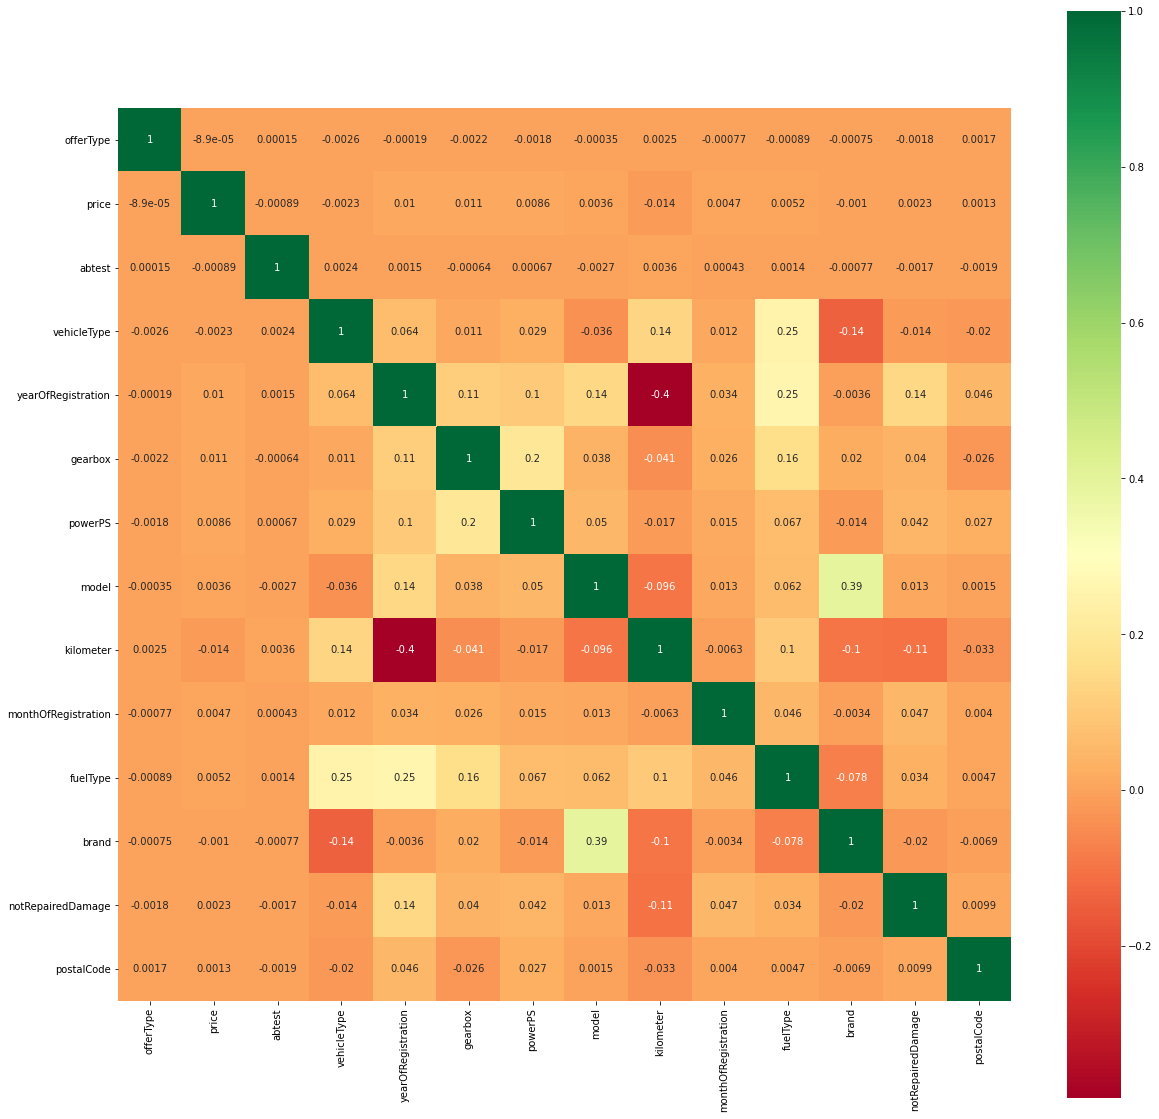

In [89]:
#korelace mezi fetures - nevypada to dobre
plt.figure(figsize=(20,20))
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)
plt.savefig('corelace_bez_Nan_hodnot.png')

<Figure size 1440x1440 with 0 Axes>

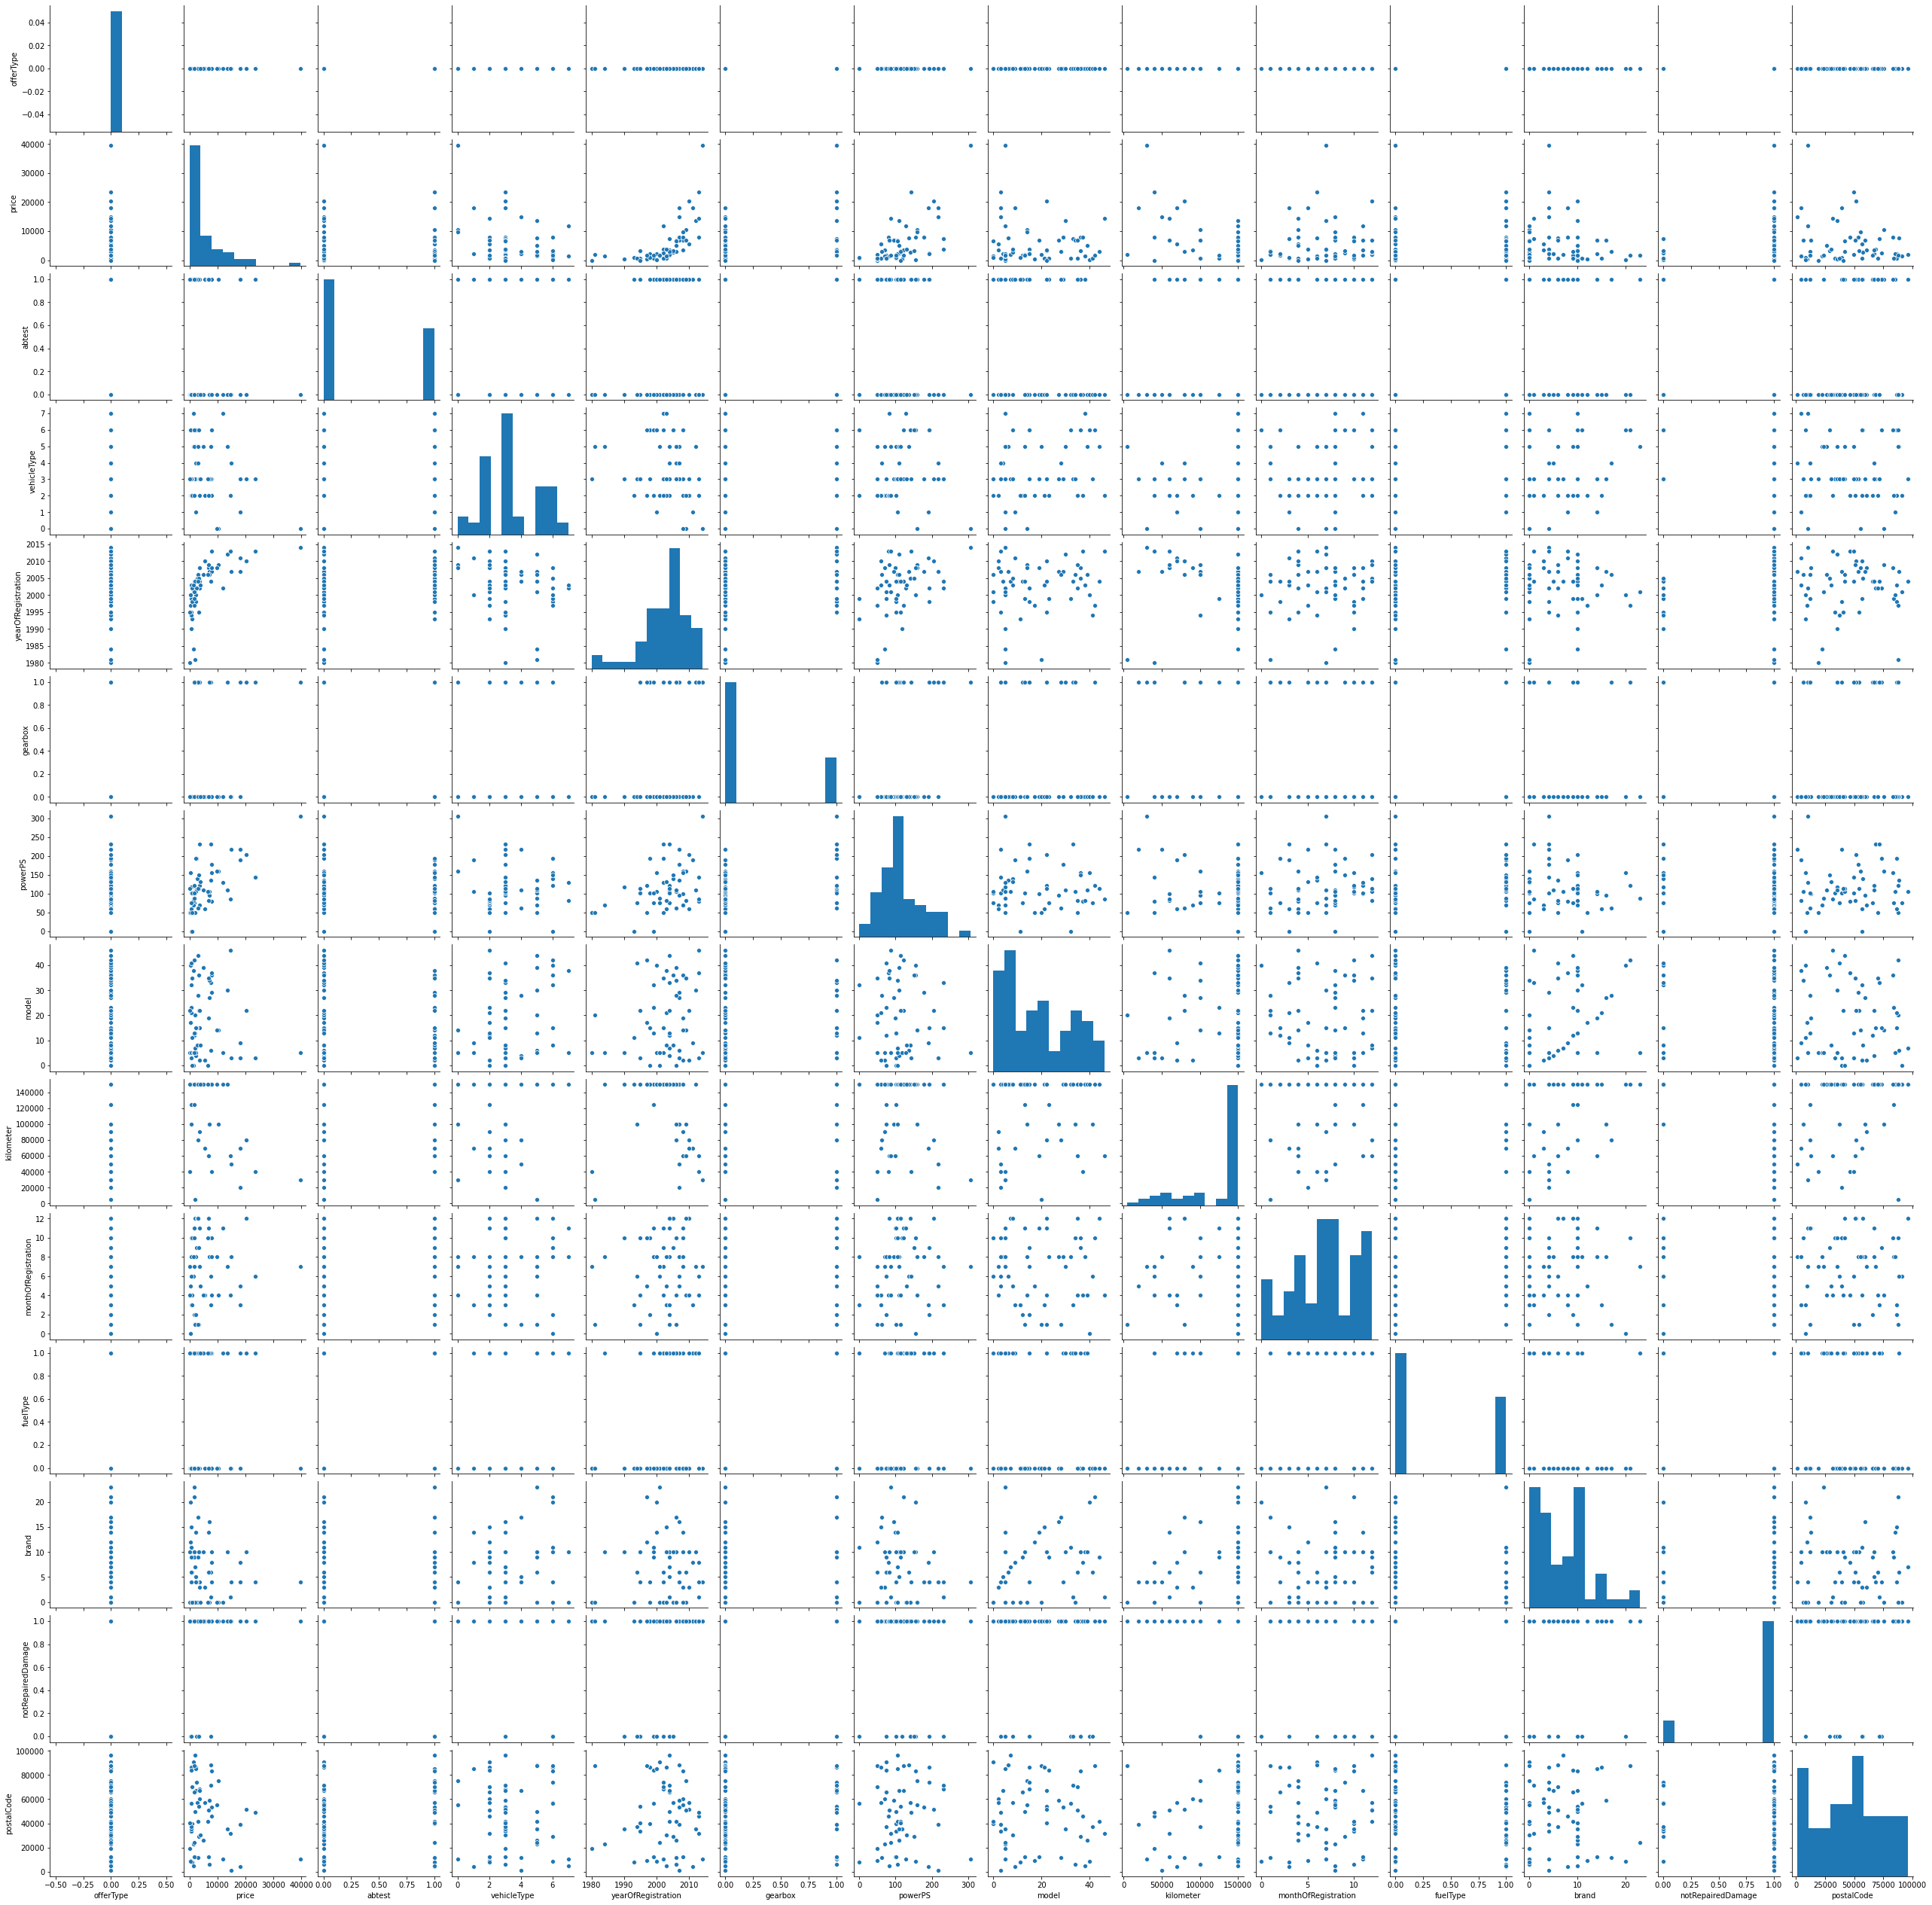

In [90]:
smallerDF= df.loc[:100,:]
plt.figure(figsize=(20,20))
p=sns.pairplot(smallerDF)
plt.savefig('pairplot.png')

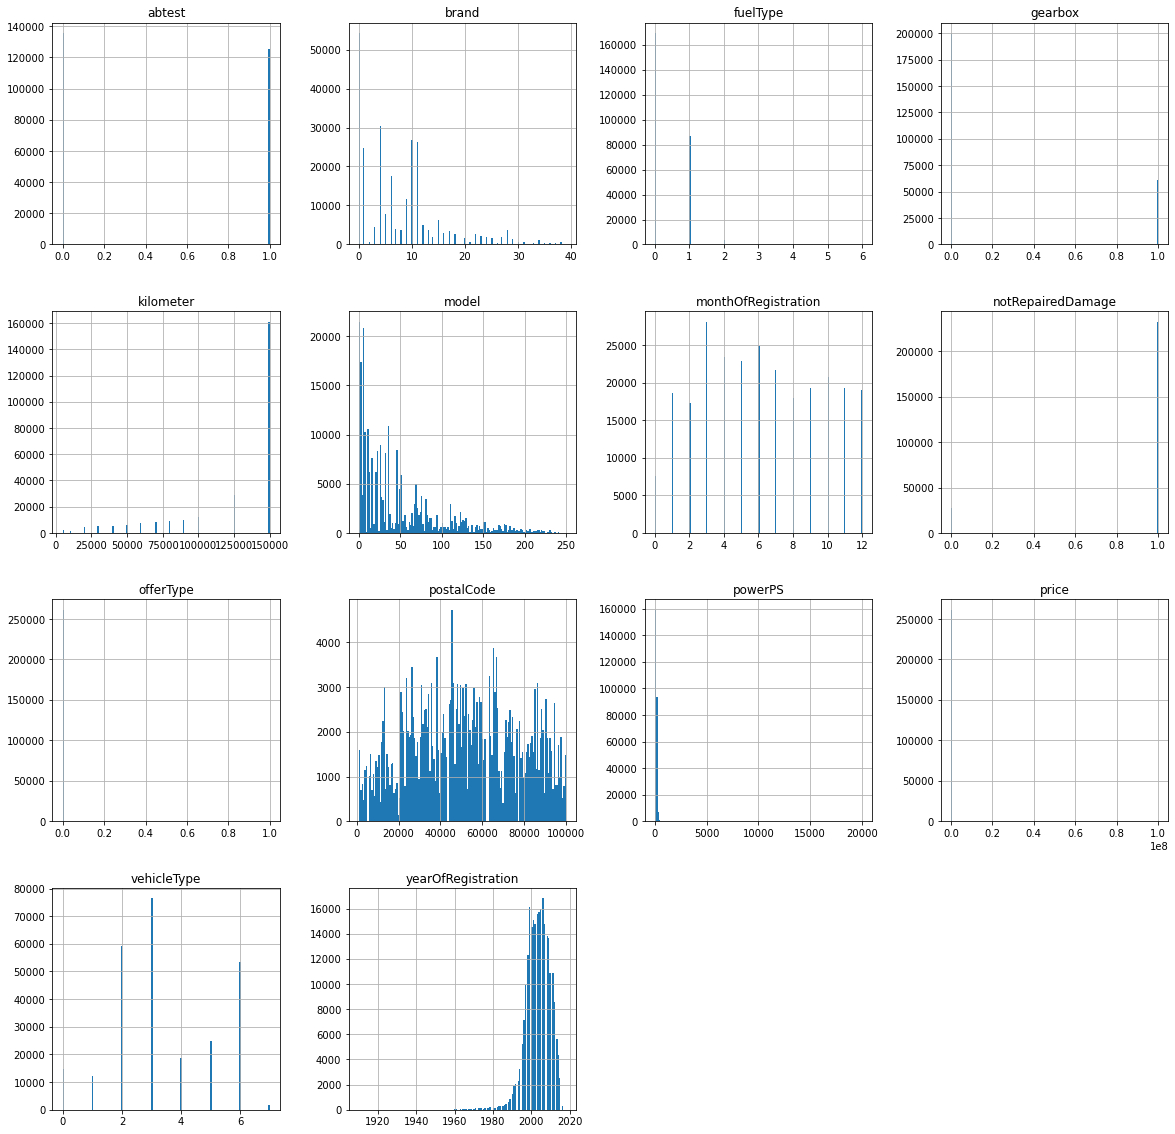

In [91]:
p = df.hist(figsize=(20,20),bins=150)
plt.savefig('histogram.png')

## Data Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(df[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]),
                      columns=['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration'],
                      index=df.index)
scaled.head()
clean_df = df.copy(deep=True)
clean_df[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']] = scaled[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]
clean_df.head()
# co s monthOfRegistration dateCreated postalCode lastSeen ??


,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
3,0,1500,0,-0.798184,-0.354645,0.0,-0.353341,-0.927086,0.651005,6,-0.669247,-1.001729,1.0,2016-03-17,91074,2016-03-17 17:40:17
4,0,3600,0,-0.798184,0.720269,0.0,-0.394641,-0.888293,-0.854713,7,1.102691,-0.612246,1.0,2016-03-31,60437,2016-04-06 10:17:21
5,0,650,0,-0.234664,-1.276000,0.0,-0.167489,-0.868896,0.651005,10,-0.669247,-0.482419,0.0,2016-04-04,33775,2016-04-06 19:17:07
6,0,2200,0,0.328855,0.106033,0.0,-0.119305,-0.849500,0.651005,8,-0.669247,-0.352591,1.0,2016-04-01,67112,2016-04-05 18:18:39
7,0,0,0,-0.234664,-3.579387,0.0,-0.525425,-0.830104,-2.109478,7,-0.669247,-1.001729,1.0,2016-03-21,19348,2016-03-25 16:47:58


#### MinaMaxScaler

In [93]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
minMax = pd.DataFrame(sc.fit_transform(df[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]),
                      columns=['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration'],
                      index=df.index)
clean_df_minmax = df.copy(deep=True)
clean_df_minmax[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']] = minMax[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]
clean_df_minmax.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,0,480,0,NaN,0.110346,0.0,0.00000,0.000,1.000000,0,0.000000,0.000000,NaN,2016-03-24,70435,2016-04-07 03:16:57
1,0,18300,0,0.000000,0.112346,0.0,0.00950,NaN,0.827586,5,0.166667,0.025641,0.0,2016-03-24,66954,2016-04-07 01:46:50
2,0,9800,0,0.142857,0.111568,1.0,0.00815,0.004,0.827586,8,0.166667,0.051282,NaN,2016-03-14,90480,2016-04-05 12:47:46
3,0,1500,0,0.285714,0.111235,0.0,0.00375,0.000,1.000000,6,0.000000,0.000000,1.0,2016-03-17,91074,2016-03-17 17:40:17
4,0,3600,0,0.285714,0.112012,0.0,0.00345,0.008,0.586207,7,0.166667,0.076923,1.0,2016-03-31,60437,2016-04-06 10:17:21


#### RobustScaler

In [96]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
robust = pd.DataFrame(rs.fit_transform(df[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]),
                      columns=['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration'],
                      index=df.index)
clean_df_robust = df.copy(deep=True)
clean_df_robust[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']] = robust[['brand','fuelType','kilometer','model','powerPS','vehicleType','yearOfRegistration']]
clean_df_robust.head()

,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,0,480,0,NaN,-1.111111,0.0,-1.3125,-0.451613,0.0,0,0.0,-0.6,NaN,2016-03-24,70435,2016-04-07 03:16:57
1,0,18300,0,-1.000000,0.888889,0.0,1.0625,NaN,-1.0,5,1.0,-0.5,0.0,2016-03-24,66954,2016-04-07 01:46:50
2,0,9800,0,-0.666667,0.111111,1.0,0.7250,-0.435484,-1.0,8,1.0,-0.4,NaN,2016-03-14,90480,2016-04-05 12:47:46
3,0,1500,0,-0.333333,-0.222222,0.0,-0.3750,-0.451613,0.0,6,0.0,-0.6,1.0,2016-03-17,91074,2016-03-17 17:40:17
4,0,3600,0,-0.333333,0.555556,0.0,-0.4500,-0.419355,-2.4,7,1.0,-0.3,1.0,2016-03-31,60437,2016-04-06 10:17:21
